#Correlation vs mode number

In [7]:
%matplotlib inline
import sys
sys.path.append('/home/photon/code/PylonCCD')
import numpy as np
import Qfunction as Qfunc
import scipy.stats as sp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [8]:
mpl.rcParams['figure.figsize'] = (12.0, 6.0)

In [9]:
cd "/home/photon/data/06-15-2015"

/home/photon/data/06-15-2015


In [10]:
ls

10-42-54_raw.npz  10-43-49_raw.npz


In [11]:
vac_file = np.load("10-42-54_raw.npz")
signal_file = np.load("10-43-49_raw.npz")
vac_data = vac_file['dataOut']
signal_data = signal_file['dataOut']
ncount = signal_file['ncount']
Kp_vac = np.average(vac_data,axis=(1,2))

#implement eqns (9) and (10) from PRA paper:
scaledVacuumCorrected = np.sqrt(2.0/ncount)*(signal_data - Kp_vac.reshape(600,1,1))

In [32]:
modeA = 204
modes = range(0,250)

output = scaledVacuumCorrected[modeA,:,:].flatten()  # Choose the mode to analyze
x = np.real(output)
y = np.imag(output)

Pearson = np.zeros(250, dtype = np.complex)
theta = []
photonNumber = []

for i in modes:
    
        RealPearson, p = sp.pearsonr(np.real(scaledVacuumCorrected[i].flatten()), x)
        ImagPearson, p = sp.pearsonr(np.imag(scaledVacuumCorrected[i].flatten()), y)
        Pearson[i] = RealPearson + ImagPearson*1j
        #Pearson_real.append(RealPearson)
        #Pearson_imag.append(ImagPearson)
        theta.append(modes[i] * (780e-9*1000)/(600*20e-6))
        photonNumber.append(0.5*(np.average(np.abs(scaledVacuumCorrected[i])))**2)
    

In [63]:
# Calculate the correlation matrix between magnitude of each mode.
modes = range(0,250)

PearsonMagnitude = np.zeros((250,250))

for i in modes:
    output = scaledVacuumCorrected[i,:,:].flatten()  # Choose the mode to analyze
    x = np.abs(output)
    for k in modes:
        Pearson, p = sp.pearsonr(np.abs(scaledVacuumCorrected[k].flatten()), x)
        PearsonMagnitude[i,k] = Pearson

In [66]:
# Calculate the correlation matrix between phase of each mode.
modes = range(0,250)

PearsonPhase = np.zeros((250,250))

for i in modes:
    output = scaledVacuumCorrected[i,:,:].flatten()  # Choose the mode to analyze
    x = np.angle(output)
    for k in modes:
        Pearson, p = sp.pearsonr(np.angle(scaledVacuumCorrected[k].flatten()), x)
        PearsonPhase[i,k] = Pearson

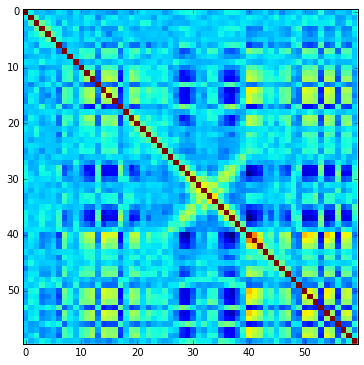

In [74]:
plt.imshow(PearsonPhase[170:230,170:230],interpolation='none')

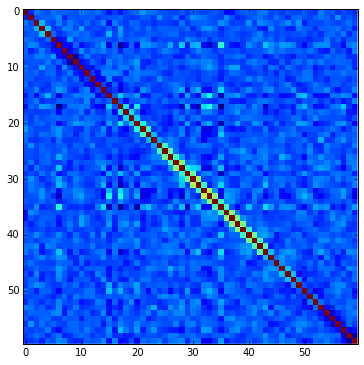

In [69]:
plt.imshow(PearsonMagnitude[170:230,170:230],interpolation='none')

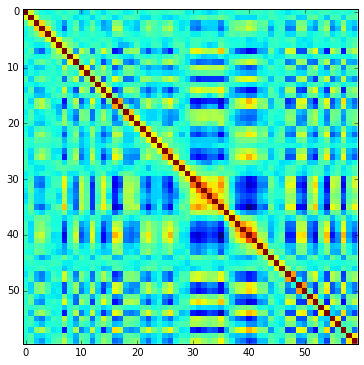

In [71]:
plt.imshow(np.real(PearsonMatrix[170:230,170:230]),interpolation='none')

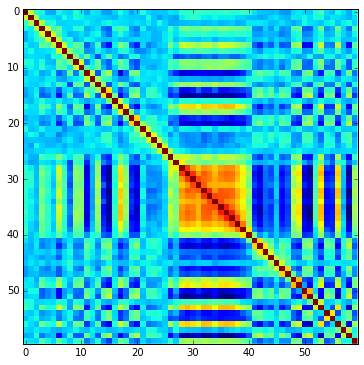

In [72]:
plt.imshow(np.imag(PearsonMatrix[170:230,170:230]),interpolation='none')

In [29]:
np.real(PearsonMatrix[170:230,170:230])

array([[ 1.        ,  0.36144394,  0.10145598, ...,  0.01230717,
        -0.0038775 ,  0.03978873],
       [ 0.36144394,  1.        ,  0.36836222, ..., -0.08930754,
         0.08138063,  0.08503535],
       [ 0.10145598,  0.36836222,  1.        , ...,  0.18748661,
        -0.07703251, -0.11046513],
       ..., 
       [ 0.01230717, -0.08930754,  0.18748661, ...,  1.        ,
         0.10909034, -0.26690884],
       [-0.0038775 ,  0.08138063, -0.07703251, ...,  0.10909034,
         1.        ,  0.44105866],
       [ 0.03978873,  0.08503535, -0.11046513, ..., -0.26690884,
         0.44105866,  1.        ]])

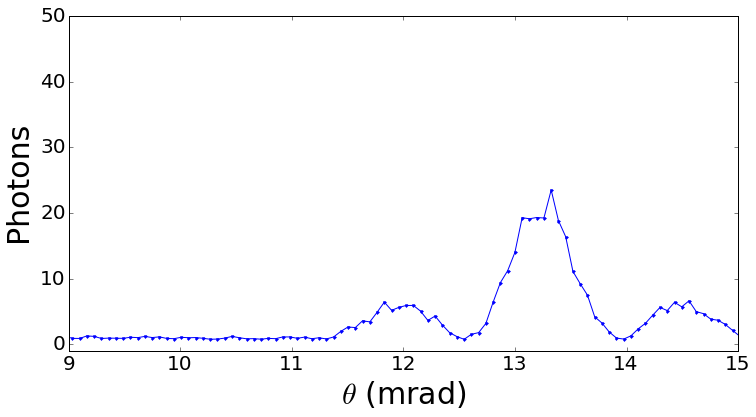

In [34]:
plt.plot(theta, photonNumber ,".-")
plt.xlabel("$\\theta$ (mrad)",fontsize=30)
plt.ylabel("Photons",fontsize=30)
plt.xlim((9,15))
plt.ylim((-1,50))
plt.tick_params(labelsize=20)

[9, 15, -1.1, 1.1]

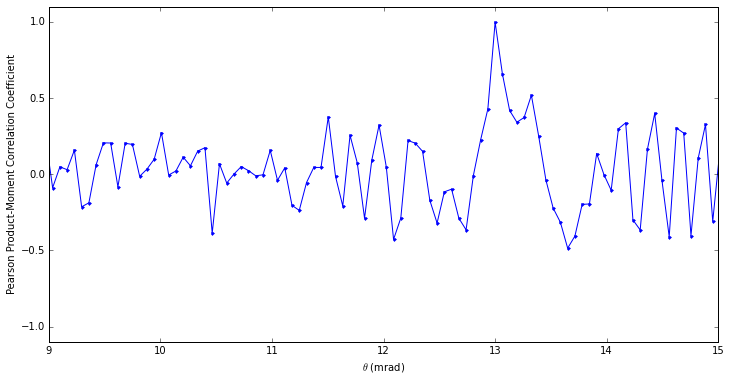

In [58]:
plt.plot(theta,PearsonMatrix[200,:].real,".-")
#plot(theta,Pearson_imagF,".-")
plt.xlabel("$\\theta$ (mrad)")
plt.ylabel("Pearson Product-Moment Correlation Coefficient")
plt.axis([9,15,-1.1,1.1])

[9, 15, -1.1, 1.1]

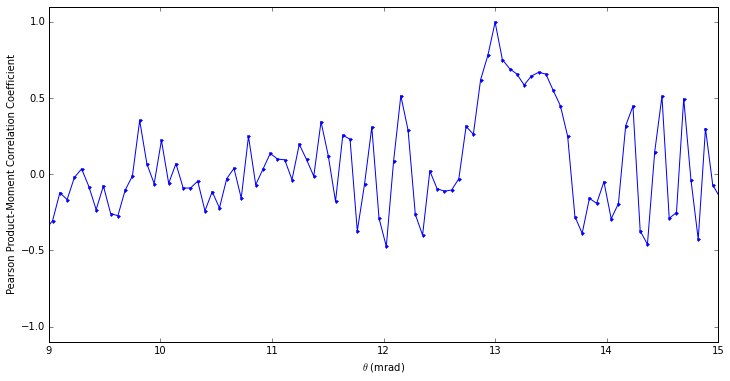

In [39]:
plt.plot(theta,PearsonMatrix[200,:].imag,".-")
plt.xlabel("$\\theta$ (mrad)")
plt.ylabel("Pearson Product-Moment Correlation Coefficient")
plt.axis([9,15,-1.1,1.1])

[9, 15, -1.1, 1.1]

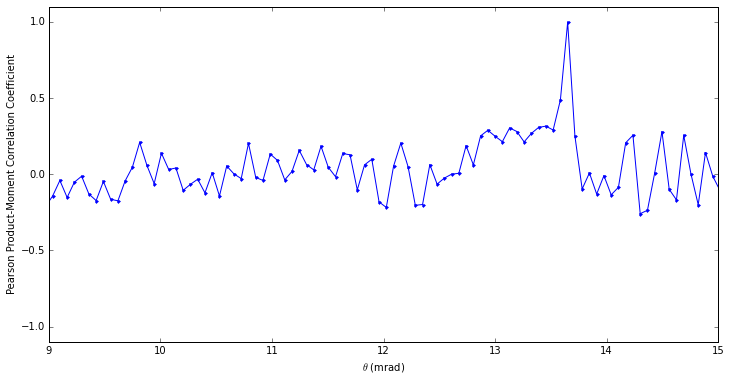

In [42]:
plt.plot(theta,PearsonMatrix[210,:].imag,".-")
plt.xlabel("$\\theta$ (mrad)")
plt.ylabel("Pearson Product-Moment Correlation Coefficient")
plt.axis([9,15,-1.1,1.1])